In [1]:
import pandas as pd

df = pd.read_csv('/home/krishna/Downloads/dataset.csv')
df.head(15)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1
5,0.800000,0.585158,1.000000,0.8,0.8,0.871795,0.759200,0.821151,0.721994,1
6,0.333333,0.691947,0.888889,0.6,0.5,0.461538,0.495588,0.584720,0.440509,1
7,0.000000,0.477887,0.333333,0.5,0.5,0.512821,0.365087,0.481692,0.330780,0
8,0.266667,0.662736,0.888889,0.7,0.6,0.538462,0.482060,0.601124,0.647887,1
9,0.066667,0.492876,0.888889,0.3,0.4,0.205128,0.390003,0.345407,0.333950,0


In [2]:
import pandas as pd 
# Makes sure we see all columns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

class DataLoader():
    def __init__(self):
        self.data = None

    def load_dataset(self, path='/home/krishna/Downloads/dataset.csv'):
        self.data = pd.read_csv(path)
    '''
    def preprocess_data(self):
        # One-hot encode all categorical columns
        categorical_cols = ["gender",
                            "ever_married",
                            "work_type",
                            "Residence_type",
                            "smoking_status"]
        encoded = pd.get_dummies(self.data[categorical_cols], 
                                prefix=categorical_cols)

        # Update data with new columns
        self.data = pd.concat([encoded, self.data], axis=1)
        self.data.drop(categorical_cols, axis=1, inplace=True)

        # Impute missing values of BMI
        self.data.bmi = self.data.bmi.fillna(0)
        
        # Drop id as it is not relevant
        self.data.drop(["id"], axis=1, inplace=True)

        # Standardization 
        # Usually we would standardize here and convert it back later
        # But for simplification we will not standardize / normalize the features
    '''
    def get_data_split(self):
        X = self.data.drop(columns=['call_for_interview'])
        y = self.data['call_for_interview']
        return train_test_split(X, y, test_size=0.20, random_state=2021)

    
    def oversample(self, X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='minority')
        # Convert to numpy and oversample
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        # Convert back to pandas
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over


(300, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   years_of_experience          300 non-null    float64
 1   functional_competency_score  300 non-null    float64
 2   top1_skills_score            300 non-null    float64
 3   top2_skills_score            300 non-null    float64
 4   top3_skills_score            300 non-null    float64
 5   behavior_competency_score    300 non-null    float64
 6   top1_behavior_skill_score    300 non-null    float64
 7   top2_behavior_skill_score    300 non-null    float64
 8   top3_behavior_skill_score    300 non-null    float64
 9   call_for_interview           300 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 23.6 KB
col:  years_of_experience


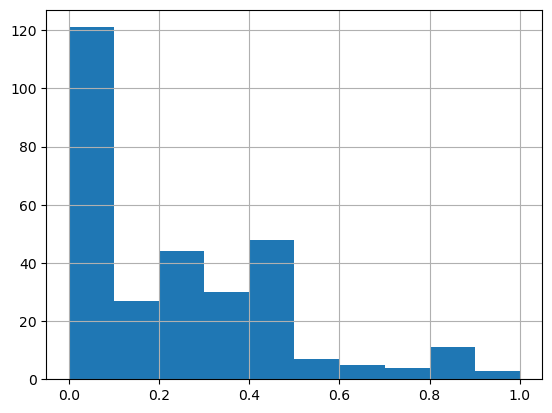

col:  functional_competency_score


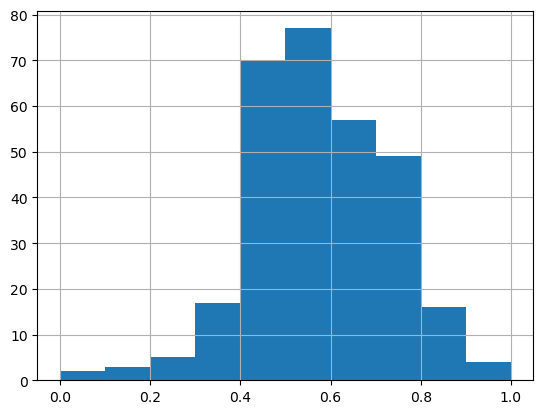

col:  top1_skills_score


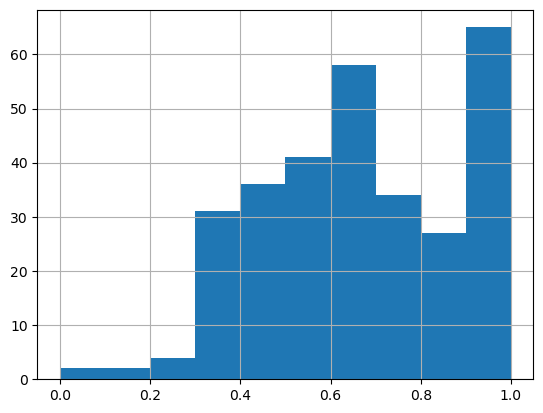

col:  top2_skills_score


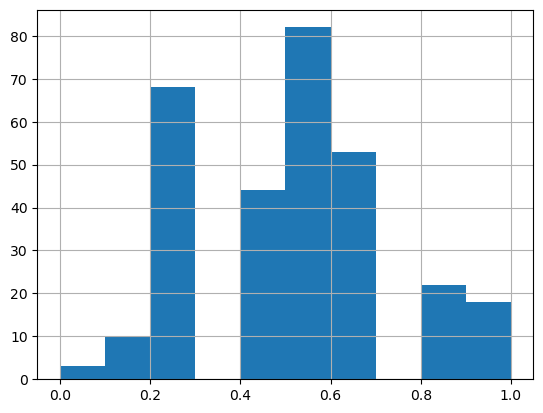

col:  top3_skills_score


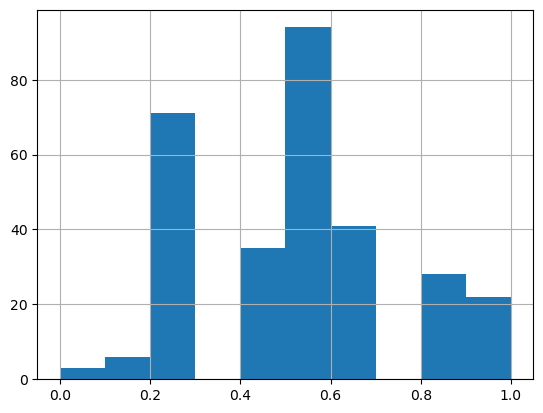

col:  behavior_competency_score


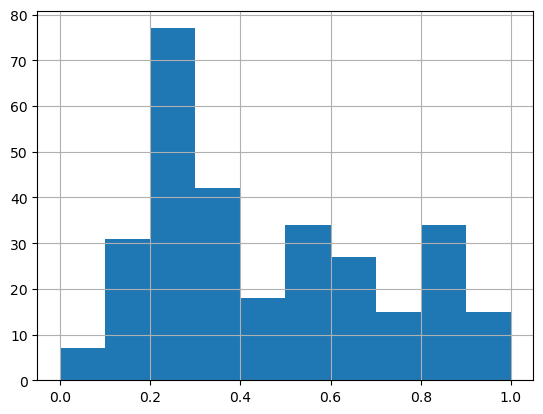

col:  top1_behavior_skill_score


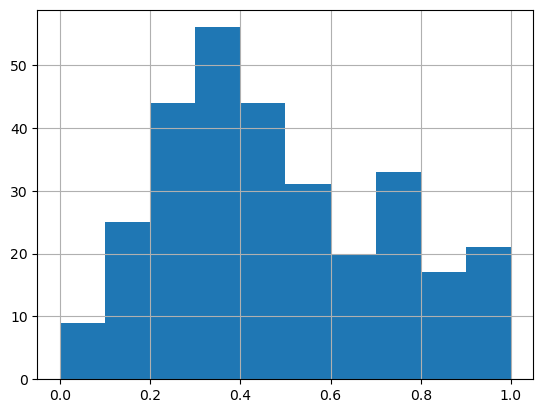

col:  top2_behavior_skill_score


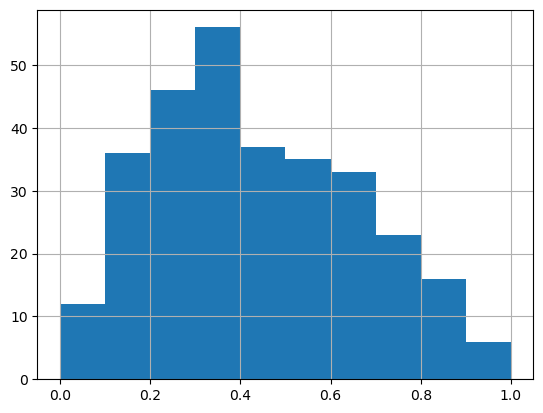

col:  top3_behavior_skill_score


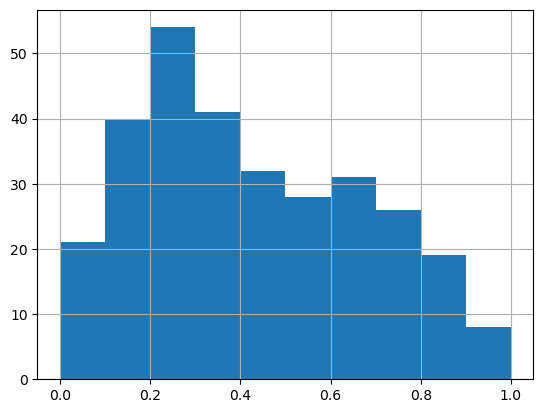

col:  call_for_interview


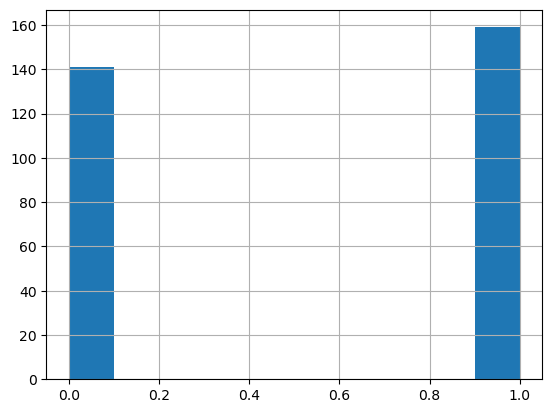

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [3]:
# %% Imports
import matplotlib.pyplot as plt

# %% Load data
data_loader = DataLoader()
data_loader.load_dataset()
data = data_loader.data

# %% Show head
print(data.shape)
data.head()

# %% Show general statistics
data.info()

# %% Show histogram for all columns
columns = data.columns
for col in columns:
    print("col: ", col)
    data[col].hist()
    plt.show()


data_loader.data.head()


In [4]:
data_loader.data.head(15)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1
5,0.800000,0.585158,1.000000,0.8,0.8,0.871795,0.759200,0.821151,0.721994,1
6,0.333333,0.691947,0.888889,0.6,0.5,0.461538,0.495588,0.584720,0.440509,1
7,0.000000,0.477887,0.333333,0.5,0.5,0.512821,0.365087,0.481692,0.330780,0
8,0.266667,0.662736,0.888889,0.7,0.6,0.538462,0.482060,0.601124,0.647887,1
9,0.066667,0.492876,0.888889,0.3,0.4,0.205128,0.390003,0.345407,0.333950,0


In [5]:
X = df.drop('call_for_interview', axis=1)

In [6]:
# %% Imports

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score


# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

(250, 9)
(60, 9)
F1 Score 0.9330357142857143
Accuracy 0.9333333333333333


In [7]:
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree, 
                                ExplainableBoostingClassifier)
from interpret.blackbox import LimeTabular
from interpret import show
from sklearn.metrics import f1_score, accuracy_score
lime = LimeTabular( 
                   data=X_train, 
                   random_state=1, model = rf)
# Get local explanations
lime_local = lime.explain_local(X_test[0:1], 
                                y_test[0:1], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/125998023294112/ -->

In [88]:
import lime 
from lime import lime_tabular
import numpy as np
test_1 = X_test.iloc[1]

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'],
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=rf.predict_proba
)
lime_exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [8]:
# %% Create SHAP explainer
import shap
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 0
end_index = 1
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values



(1, 9)


The RF predicted: 1


In [14]:
shap_values[0].shape

(1, 9)

Variable Importance Plot - Global Interpretation


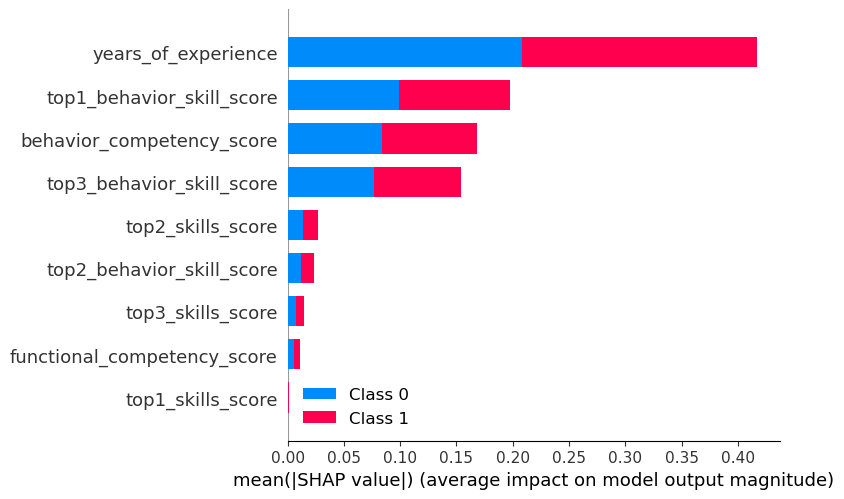

In [90]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

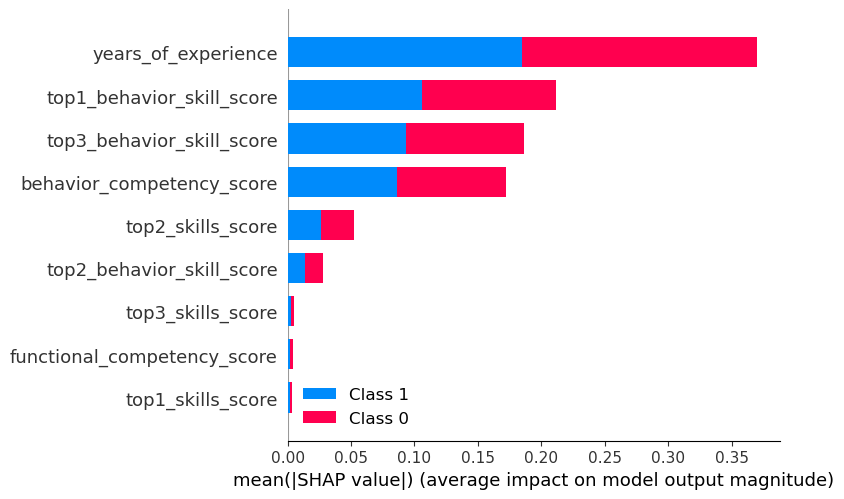

In [11]:
shap.summary_plot(shap_values, X)

In [92]:
# %% Create diverse counterfactual explanations
# pip install dice-ml
import dice_ml
# Dataset
data_dice = dice_ml.Data(dataframe=data_loader.data, 
                         # For perturbation strategy
                         continuous_features=['years_of_experience', 'functional_competency_score','top1_skills_score', 'top2_skills_score','top3_skills_score', 'behavior_competency_score', 'top1_behavior_skill_score', 'top2_behavior_skill_score', 'top3_behavior_skill_score'], 
                         outcome_name='call_for_interview')
# Model
rf_dice = dice_ml.Model(model=rf, 
                        # There exist backends for tf, torch, ...
                        backend="sklearn")
explainer = dice_ml.Dice(data_dice, 
                         rf_dice, 
                         # Random sampling, genetic algorithm, kd-tree,...
                         method="genetic")


In [13]:
X_test[0:1]

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score
76,0.4,0.576164,0.666667,0.6,0.5,0.538462,0.574969,0.422524,0.504166


In [93]:
input_datapoint = X_test[0:1]

cf = explainer.generate_counterfactuals(input_datapoint, 
                                  total_CFs=5, 
                                  desired_class="opposite")
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.02it/s]

Query instance (original outcome : 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.4,0.576164,0.666667,0.6,0.5,0.538462,0.574969,0.422524,0.504166,1



Diverse Counterfactual set (new outcome: 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.66115779,0.7,0.7,-,0.58974361,0.550049126,0.551986158,0.42626839876,0.0
0,0.0,0.58265775,0.7,0.4,-,0.2820513,0.496978402,0.246949896,0.24405527115,0.0
0,0.0,0.50747555,0.4,-,-,0.20512821,0.370098144,0.226993635,0.27382832766,0.0
0,0.2,0.41523999,0.7,0.3,-,0.23076923,0.323464751,0.168897882,0.29693350196,0.0
0,0.0,0.50747555,0.3,-,-,0.2820513,0.370098144,0.0,0.27382832766,0.0


In [25]:
import dice_ml
l = cf.visualize_as_list()

In [26]:
print(l[0])

In [29]:
# %% Create feasible (conditional) Counterfactuals
input_datapoint = X_test[20:21]
features_to_vary=['years_of_experience', 'functional_competency_score', 'behavior_competency_score', 'top1_skills_score', 'top2_skills_score', 'top3_skills_score']
permitted_range = {
    'years_of_experience': [0.0,1.0],
    'functional_competency_score': [0.00000000, 1.00000000],
    'behavior_competency_score': [0.00000000, 1.00000000],
    'top1_skills_score': [0.0, 0.1],
    'top2_skills_score': [0.0, 0.1],
    'top3_skills_score': [0.0, 0.1],
}
# Now generating explanations using the new feature weights
cf = explainer.generate_counterfactuals(input_datapoint, 
                                  total_CFs=5, 
                                  desired_class="opposite",
                                  permitted_range=permitted_range,
                                  features_to_vary=features_to_vary)
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.26it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.333333,0.555556,0.3,0.5,0.179487,0.288344,0.180316,0.193368,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.55555558,0.1,0.1,0.1,0.46153846,-,-,-,1.0
0,0.2,0.55555558,0.0,0.1,0.1,0.46153846,-,-,-,1.0
0,0.3,0.22222222,0.0,0.1,0.0,0.56410259,-,-,-,1.0
0,0.2,0.58331555,0.0,0.0,0.1,0.46153846,-,-,-,1.0
0,0.4,0.22222222,0.1,0.0,0.0,0.53846157,-,-,-,1.0


In [30]:
cf.cf_examples_list[0].final_cfs_df.to_csv(path_or_buf='counterfactuals.csv', index=False)

In [1]:
import pandas as pd

cfff = pd.read_csv('counterfactuals.csv')
cfff.head(5)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.595900,0.1,0.1,0.1,0.538462,0.071463,0.015850,0.096438,0
1,0.4,0.576164,0.1,0.1,0.1,0.538462,0.000233,0.075882,0.096438,1
2,0.3,0.582040,0.0,0.0,0.1,0.538462,0.005316,0.091434,0.096438,0
3,0.4,0.600267,0.1,0.0,0.1,0.564103,0.052110,0.057986,0.096438,1
4,0.4,0.522807,0.1,0.0,0.1,0.538462,0.082918,0.042498,0.096438,0


In [4]:
cfff.head(15)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.595900,0.1,0.1,0.1,0.538462,0.071463,0.015850,0.096438,0
1,0.4,0.576164,0.1,0.1,0.1,0.538462,0.000233,0.075882,0.096438,1
2,0.3,0.582040,0.0,0.0,0.1,0.538462,0.005316,0.091434,0.096438,0
3,0.4,0.600267,0.1,0.0,0.1,0.564103,0.052110,0.057986,0.096438,1
4,0.4,0.522807,0.1,0.0,0.1,0.538462,0.082918,0.042498,0.096438,0


## Clustering

In [59]:
import torch
tensor_data = torch.tensor(df.values, dtype=torch.float64)

# Display the resulting tensor
print(df.iloc[20])
print(tensor_data[20])

years_of_experience            0.400000
functional_competency_score    0.222222
top1_skills_score              0.888889
top2_skills_score              0.500000
top3_skills_score              0.500000
behavior_competency_score      0.538462
top1_behavior_skill_score      0.282662
top2_behavior_skill_score      0.166636
top3_behavior_skill_score      0.264135
call_for_interview             1.000000
Name: 20, dtype: float64
tensor([0.4000, 0.2222, 0.8889, 0.5000, 0.5000, 0.5385, 0.2827, 0.1666, 0.2641,
        1.0000], dtype=torch.float64)


In [45]:
list_from_values = df.values.tolist()


In [83]:
success = []
for i in list_from_values:
    if i[-1]==1.0:
        success.append(i)
        list_from_values.remove(i)

In [84]:
print(len(success))

105


In [35]:
df['call_for_interview'].value_counts()

1    159
0    141
Name: call_for_interview, dtype: int64

In [94]:
df1 = df
df2 = pd.DataFrame(columns=df1.columns)

# Identify rows with "call_for_interview" equal to 1.0
condition = df1['call_for_interview'] == 1.0

# Select the rows that meet the condition
selected_rows = df1.loc[condition]

# Assign the selected rows to df2
df2 = df2.append(selected_rows, ignore_index=True)

# Drop the rows from df1 where "call_for_interview" is 1.0
df1 = df1[~condition]

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [95]:
l1 = df2.drop(columns=['call_for_interview']).values.tolist()
print(l1)

[[0.3333333333333333, 0.7494977777777777, 0.7777777777777778, 0.7, 0.8, 0.7692307692307692, 0.9316893589492192, 0.6620421671026925, 0.7524629947278958], [0.4, 0.6620199999999999, 0.6666666666666666, 0.7, 0.5, 0.4615384615384614, 0.4979287376972561, 0.3975442195680384, 0.3927595251377358], [0.8, 0.5851577777777778, 1.0, 0.8, 0.8, 0.8717948717948718, 0.7592000031095578, 0.8211514248169322, 0.7219940761640676], [0.3333333333333333, 0.6919466666666666, 0.8888888888888888, 0.6, 0.5, 0.4615384615384614, 0.4955875532008962, 0.5847196152401011, 0.4405086023766746], [0.2666666666666666, 0.6627355555555555, 0.8888888888888888, 0.7, 0.6, 0.5384615384615384, 0.4820595507469346, 0.6011240413008371, 0.6478866708970547], [0.2, 0.4578377777777777, 0.6666666666666666, 0.5, 0.5, 0.2564102564102564, 0.2804287222975328, 0.2781462228078713, 0.182321341976671], [0.0, 0.5770466666666666, 0.3333333333333333, 0.5, 0.4, 0.3333333333333332, 0.3904959128055563, 0.4581571538127307, 0.3468389003949637], [0.46666666

In [96]:
l0 = df1.drop(columns=['call_for_interview']).values.tolist()
print(l0)

[[0.1333333333333333, 0.4906377777777777, 0.7777777777777778, 0.3, 0.4, 0.1538461538461538, 0.3520927425880082, 0.1322306051248566, 0.3169054776707523], [0.0, 0.4602555555555556, 0.4444444444444444, 0.3, 0.3, 0.0512820512820512, 0.0523470230555989, 0.0897650035139527, 0.2548591532018843], [0.0, 0.5073466666666666, 0.5555555555555556, 0.4, 0.5, 0.3846153846153846, 0.3099132209261845, 0.2897576359737625, 0.4407843220089391], [0.0, 0.4778866666666667, 0.3333333333333333, 0.5, 0.5, 0.5128205128205128, 0.3650872233173474, 0.4816920695768152, 0.3307799312509018], [0.0666666666666666, 0.4928755555555557, 0.8888888888888888, 0.3, 0.4, 0.205128205128205, 0.39000316284137, 0.3454071363821854, 0.3339499533257469], [0.0666666666666666, 0.5465355555555556, 0.2222222222222222, 0.1, 0.2, 0.1282051282051282, 0.2743975699309086, 0.3415338072876173, 0.1212782325017039], [0.0, 0.5014777777777778, 0.3333333333333333, 0.4, 0.6, 0.2307692307692307, 0.4092709221450642, 0.3812131192148564, 0.2518247781065803]

In [122]:
import pandas as pd
import torch
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Convert the list to a NumPy array
data_array = np.array(l0)

# Specify the number of clusters (you need to decide this based on your data)
n_clusters = 3

# Create a KMeans model and fit it to the data
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data_array)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster Labels:", cluster_labels)
'''
# Determine the range of clusters you want to test
min_clusters = 2
max_clusters = 1180

best_silhouette_score = -1  # Initialize with a value lower than any possible score
best_n_clusters = -1

# Try different numbers of clusters and find the best silhouette score
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data_array)
    silhouette_avg = silhouette_score(data_array, cluster_labels)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")
    
    # Update the best silhouette score and corresponding number of clusters
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

print(f"\nThe best number of clusters is: {best_n_clusters} with a silhouette score of {best_silhouette_score}")
'''

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 2, the average silhouette_score is: 0.15651677786140922
For n_clusters = 3, the average silhouette_score is: 0.15325790304701223
For n_clusters = 4, the average silhouette_score is: 0.12688450607284008
For n_clusters = 5, the average silhouette_score is: 0.12402319497242406


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 6, the average silhouette_score is: 0.1300951712435699
For n_clusters = 7, the average silhouette_score is: 0.12868118064657913
For n_clusters = 8, the average silhouette_score is: 0.12249270364881376


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 9, the average silhouette_score is: 0.13410433821871953
For n_clusters = 10, the average silhouette_score is: 0.1281541459635727


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 11, the average silhouette_score is: 0.1296212855520357
For n_clusters = 12, the average silhouette_score is: 0.13285166971758428


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 13, the average silhouette_score is: 0.12753580708397252


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 14, the average silhouette_score is: 0.12870711601299523
For n_clusters = 15, the average silhouette_score is: 0.13667715769242547


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 16, the average silhouette_score is: 0.1391063546912319


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 17, the average silhouette_score is: 0.12592932484043348
For n_clusters = 18, the average silhouette_score is: 0.13003424849919692


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 19, the average silhouette_score is: 0.13152063774668332
For n_clusters = 20, the average silhouette_score is: 0.14558991586454417


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 21, the average silhouette_score is: 0.12852091021417697
For n_clusters = 22, the average silhouette_score is: 0.13992825813810447


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 23, the average silhouette_score is: 0.1321752381684699
For n_clusters = 24, the average silhouette_score is: 0.13033947157455184


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 25, the average silhouette_score is: 0.12923593359938773
For n_clusters = 26, the average silhouette_score is: 0.11501397802575077


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 27, the average silhouette_score is: 0.1419915708974325
For n_clusters = 28, the average silhouette_score is: 0.12478767532985265


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 29, the average silhouette_score is: 0.1262915560625624


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 30, the average silhouette_score is: 0.12338691450496822
For n_clusters = 31, the average silhouette_score is: 0.1299032305229329


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 32, the average silhouette_score is: 0.12343000605881545
For n_clusters = 33, the average silhouette_score is: 0.12621266648641624


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 34, the average silhouette_score is: 0.12946751106111645
For n_clusters = 35, the average silhouette_score is: 0.13966242846144641


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 36, the average silhouette_score is: 0.11722222605478874
For n_clusters = 37, the average silhouette_score is: 0.12708065300035024


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 38, the average silhouette_score is: 0.13480417018004334
For n_clusters = 39, the average silhouette_score is: 0.1273758893697714


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 40, the average silhouette_score is: 0.1360418327971073


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 41, the average silhouette_score is: 0.1326070160091184
For n_clusters = 42, the average silhouette_score is: 0.12253647260170354


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 43, the average silhouette_score is: 0.1314422321487617
For n_clusters = 44, the average silhouette_score is: 0.12883763912212864


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 45, the average silhouette_score is: 0.12963382290020783
For n_clusters = 46, the average silhouette_score is: 0.1245249033289718


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 47, the average silhouette_score is: 0.12174928707314518


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 48, the average silhouette_score is: 0.12535125916219675
For n_clusters = 49, the average silhouette_score is: 0.12703352009219385


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 50, the average silhouette_score is: 0.12016220504521982
For n_clusters = 51, the average silhouette_score is: 0.13031058154343972


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 52, the average silhouette_score is: 0.12249358860675438
For n_clusters = 53, the average silhouette_score is: 0.12411900055286926


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 54, the average silhouette_score is: 0.12667329569976918
For n_clusters = 55, the average silhouette_score is: 0.12939327293989075


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 56, the average silhouette_score is: 0.11935059940443332


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 57, the average silhouette_score is: 0.13397472768753663
For n_clusters = 58, the average silhouette_score is: 0.12056291108358493


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 59, the average silhouette_score is: 0.12012056408746716
For n_clusters = 60, the average silhouette_score is: 0.1172474501774416


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 61, the average silhouette_score is: 0.1276662971738246
For n_clusters = 62, the average silhouette_score is: 0.11148493607801162


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 63, the average silhouette_score is: 0.1271792172494723
For n_clusters = 64, the average silhouette_score is: 0.1287398673113012


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 65, the average silhouette_score is: 0.12439250733678353
For n_clusters = 66, the average silhouette_score is: 0.11644646548405133


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 67, the average silhouette_score is: 0.12231053597177961
For n_clusters = 68, the average silhouette_score is: 0.13172471950906214


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 69, the average silhouette_score is: 0.1291430776700235
For n_clusters = 70, the average silhouette_score is: 0.12827637965987776


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 71, the average silhouette_score is: 0.13518155126999018
For n_clusters = 72, the average silhouette_score is: 0.12632639586425423


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 73, the average silhouette_score is: 0.11228675036317486
For n_clusters = 74, the average silhouette_score is: 0.1180490952307925


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 75, the average silhouette_score is: 0.11917968876656101
For n_clusters = 76, the average silhouette_score is: 0.12615001635939366


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 77, the average silhouette_score is: 0.11744377931749157
For n_clusters = 78, the average silhouette_score is: 0.11813557161216034


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 79, the average silhouette_score is: 0.11729445202231055
For n_clusters = 80, the average silhouette_score is: 0.12693510055157903


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 81, the average silhouette_score is: 0.11911808543201671
For n_clusters = 82, the average silhouette_score is: 0.11851303657862752


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 83, the average silhouette_score is: 0.11576801376560696
For n_clusters = 84, the average silhouette_score is: 0.10691350423546132


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 85, the average silhouette_score is: 0.11383500420080225


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 86, the average silhouette_score is: 0.10839031953435088
For n_clusters = 87, the average silhouette_score is: 0.11627365545488842


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 88, the average silhouette_score is: 0.10849334960887173
For n_clusters = 89, the average silhouette_score is: 0.11694806774857634


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 90, the average silhouette_score is: 0.11628289694560066
For n_clusters = 91, the average silhouette_score is: 0.10718153590342962


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 92, the average silhouette_score is: 0.11138206781387332
For n_clusters = 93, the average silhouette_score is: 0.1184427412715223


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 94, the average silhouette_score is: 0.1132215857963961
For n_clusters = 95, the average silhouette_score is: 0.109600007261462


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 96, the average silhouette_score is: 0.12165087676676382
For n_clusters = 97, the average silhouette_score is: 0.1107672685988461


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 98, the average silhouette_score is: 0.11060895230363568
For n_clusters = 99, the average silhouette_score is: 0.10816686823982775


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 100, the average silhouette_score is: 0.09863288562981673
For n_clusters = 101, the average silhouette_score is: 0.11099595733390466


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 102, the average silhouette_score is: 0.10739593784217025
For n_clusters = 103, the average silhouette_score is: 0.09732074300252896


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 104, the average silhouette_score is: 0.10401581610252457
For n_clusters = 105, the average silhouette_score is: 0.09569330684587259


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 106, the average silhouette_score is: 0.10270443118327736
For n_clusters = 107, the average silhouette_score is: 0.1042590927095235


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 108, the average silhouette_score is: 0.09747953506034193
For n_clusters = 109, the average silhouette_score is: 0.08972525960049875


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 110, the average silhouette_score is: 0.09637920354677136
For n_clusters = 111, the average silhouette_score is: 0.09249337534414585


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 112, the average silhouette_score is: 0.09489394620958612
For n_clusters = 113, the average silhouette_score is: 0.08732688828549241


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 114, the average silhouette_score is: 0.08812384463880622


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 115, the average silhouette_score is: 0.0852814465758167
For n_clusters = 116, the average silhouette_score is: 0.08771962388093539


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 117, the average silhouette_score is: 0.08075521533187731


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 118, the average silhouette_score is: 0.08204255784945495


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 119, the average silhouette_score is: 0.0769479327596939


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 120, the average silhouette_score is: 0.07739603832783354


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 121, the average silhouette_score is: 0.07387612553942344
For n_clusters = 122, the average silhouette_score is: 0.0670980876437638


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 123, the average silhouette_score is: 0.06644973460550894
For n_clusters = 124, the average silhouette_score is: 0.06547943576034057


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 125, the average silhouette_score is: 0.05708800666703593


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 126, the average silhouette_score is: 0.05884196884832681


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 127, the average silhouette_score is: 0.05741846289909387


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 128, the average silhouette_score is: 0.054701981187349535
For n_clusters = 129, the average silhouette_score is: 0.05184400842141725


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 130, the average silhouette_score is: 0.04703734776141733


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 131, the average silhouette_score is: 0.04577503068991618


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 132, the average silhouette_score is: 0.04169713609850294


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 133, the average silhouette_score is: 0.037079388635892364


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 134, the average silhouette_score is: 0.033048526772379565


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 135, the average silhouette_score is: 0.02794542699431137


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 136, the average silhouette_score is: 0.02481927660419289


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 137, the average silhouette_score is: 0.023226698707957693


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 138, the average silhouette_score is: 0.01661200449076082


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 139, the average silhouette_score is: 0.012538578260668821


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 140, the average silhouette_score is: 0.00466795305218715


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


ValueError: Number of labels is 141. Valid values are 2 to n_samples - 1 (inclusive)

In [98]:
import pandas as pd
import torch
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Convert the list to a NumPy array
data_array = np.array(l0)

# Specify the number of clusters (you need to decide this based on your data)
n_clusters = 2

# Create a KMeans model and fit it to the data
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data_array)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster Labels:", cluster_labels)

Cluster Labels: [0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0
 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0]


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [99]:
# Separate data points into lists based on their clusters
cluster_0_indices = np.where(cluster_labels == 0)[0]
cluster_1_indices = np.where(cluster_labels == 1)[0]

# Create lists for each cluster
cluster_0_points = data_array[cluster_0_indices]
cluster_1_points = data_array[cluster_1_indices]

# Print or use the cluster lists as needed
print("Data points in Cluster 0:", cluster_0_points)
print("Data points in Cluster 1:", cluster_1_points)

Data points in Cluster 0: [[1.33333333e-01 4.90637778e-01 7.77777778e-01 3.00000000e-01
  4.00000000e-01 1.53846154e-01 3.52092743e-01 1.32230605e-01
  3.16905478e-01]
 [0.00000000e+00 4.60255556e-01 4.44444444e-01 3.00000000e-01
  3.00000000e-01 5.12820513e-02 5.23470231e-02 8.97650035e-02
  2.54859153e-01]
 [6.66666667e-02 4.92875556e-01 8.88888889e-01 3.00000000e-01
  4.00000000e-01 2.05128205e-01 3.90003163e-01 3.45407136e-01
  3.33949953e-01]
 [0.00000000e+00 5.91208889e-01 6.66666667e-01 5.00000000e-01
  6.00000000e-01 2.30769231e-01 3.82344485e-01 2.04097205e-01
  1.95668056e-01]
 [2.00000000e-01 3.45197778e-01 6.66666667e-01 4.00000000e-01
  4.00000000e-01 3.07692308e-01 3.31345984e-01 1.42641624e-01
  9.80507141e-02]
 [0.00000000e+00 4.79308889e-01 6.66666667e-01 3.00000000e-01
  4.00000000e-01 2.82051282e-01 2.38107017e-01 3.04321953e-01
  2.73738149e-01]
 [2.00000000e-01 4.15240000e-01 6.66666667e-01 3.00000000e-01
  5.00000000e-01 2.30769231e-01 3.23464764e-01 1.68897879e-0

In [100]:
cluster_0_df = pd.DataFrame(data_array[cluster_0_indices], columns=['years_of_experience', 'functional_competency_score', 'top1_skills_score', 'top2_skills_score', 'top3_skills_score', 'behavior_competency_score', 'top1_behavior_skill_score', 'top2_behavior_skill_score', 'top3_behavior_skill_score'])

In [101]:
cluster_0_df.head(10)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score
0,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905
1,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859
2,0.066667,0.492876,0.888889,0.3,0.4,0.205128,0.390003,0.345407,0.333950
3,0.000000,0.591209,0.666667,0.5,0.6,0.230769,0.382344,0.204097,0.195668
4,0.200000,0.345198,0.666667,0.4,0.4,0.307692,0.331346,0.142642,0.098051
5,0.000000,0.479309,0.666667,0.3,0.4,0.282051,0.238107,0.304322,0.273738
6,0.200000,0.415240,0.666667,0.3,0.5,0.230769,0.323465,0.168898,0.296934
7,0.000000,0.472764,0.444444,0.4,0.5,0.205128,0.199372,0.284177,0.038833
8,0.133333,0.420658,0.666667,0.6,0.3,0.179487,0.350915,0.218026,0.081460
9,0.000000,0.579956,0.555556,0.4,0.3,0.230769,0.293096,0.348884,0.133362


In [54]:
# %% Create feasible (conditional) Counterfactuals
input_datapoint = cluster_0_df[1:2]
features_to_vary=['years_of_experience', 'functional_competency_score', 'behavior_competency_score', 'top1_skills_score', 'top2_skills_score', 'top3_skills_score', 'top1_behavior_skill_score', 'top2_behavior_skill_score', 'top3_behavior_skill_score']
permitted_range = {
    'years_of_experience': [0.0,1.0],
    'functional_competency_score': [0.00000000, 1.00000000],
    'behavior_competency_score': [0.00000000, 1.00000000],
    'top1_skills_score': [0.0, 0.1],
    'top2_skills_score': [0.0, 0.1],
    'top3_skills_score': [0.0, 0.1],
    'top1_behavior_skill_score': [0.0, 0.1], 
    'top2_behavior_skill_score': [0.0, 0.1], 
    'top3_behavior_skill_score': [0.0, 0.1]
}
# Now generating explanations using the new feature weights
cf = explainer.generate_counterfactuals(input_datapoint, 
                                  total_CFs=5, 
                                  desired_class="opposite",
                                  permitted_range=permitted_range,
                                  features_to_vary=features_to_vary)
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.23it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.4,0.52280664,0.1,0.1,0.1,0.53846157,-,-,0.07768547582,-
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,-,-,0.00838601251,1.0
0,0.3,0.66596442,0.1,0.1,0.1,0.53846157,-,-,0.09890721027,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,-,-,0.08579127788,1.0
0,0.3,0.55159777,0.0,0.0,0.1,0.58974361,-,-,0.04602379073,1.0


In [110]:

features_to_vary=['years_of_experience', 'functional_competency_score', 'behavior_competency_score', 'top1_skills_score', 'top2_skills_score', 'top3_skills_score', 'top1_behavior_skill_score', 'top2_behavior_skill_score', 'top3_behavior_skill_score']
permitted_range = {
    'years_of_experience': [0.0,1.0],
    'functional_competency_score': [0.00000000, 1.00000000],
    'behavior_competency_score': [0.00000000, 1.00000000],
    'top1_skills_score': [0.0, 0.1],
    'top2_skills_score': [0.0, 0.1],
    'top3_skills_score': [0.0, 0.1],
    'top1_behavior_skill_score': [0.0, 0.1], 
    'top2_behavior_skill_score': [0.0, 0.1], 
    'top3_behavior_skill_score': [0.0, 0.1]
}
lis = []
for i in range(len(cluster_0_df)):
    input_datapoint = cluster_0_df[i:i+1]
    # Now generating explanations using the new feature weights
    cf = explainer.generate_counterfactuals(input_datapoint, 
                                      total_CFs=5, 
                                      desired_class="opposite",
                                      permitted_range=permitted_range,
                                      features_to_vary=features_to_vary)
    # Visualize it
    cf.cf_examples_list[0].final_cfs_df.to_csv(path_or_buf='counterfactuals.csv', index=False)
    cfff = pd.read_csv('counterfactuals.csv')
    list_of_dicts = cfff.to_dict(orient='records')
    lis.append(list_of_dicts)

    

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.06it/s]


In [ ]:
lis[2][0]['years_of_experience']

In [104]:
lis[0]

[{'years_of_experience': 0.4,
  'functional_competency_score': 0.52280664,
  'top1_skills_score': 0.1,
  'top2_skills_score': 0.1,
  'top3_skills_score': 0.0,
  'behavior_competency_score': 0.53846157,
  'top1_behavior_skill_score': 0.098413651,
  'top2_behavior_skill_score': 0.096481073,
  'top3_behavior_skill_score': 0.02933017852,
  'call_for_interview': 1},
 {'years_of_experience': 0.4,
  'functional_competency_score': 0.57616442,
  'top1_skills_score': 0.0,
  'top2_skills_score': 0.1,
  'top3_skills_score': 0.1,
  'behavior_competency_score': 0.53846157,
  'top1_behavior_skill_score': 0.06297593,
  'top2_behavior_skill_score': 0.054156535,
  'top3_behavior_skill_score': 0.08713370095,
  'call_for_interview': 1},
 {'years_of_experience': 0.3,
  'functional_competency_score': 0.58204001,
  'top1_skills_score': 0.1,
  'top2_skills_score': 0.0,
  'top3_skills_score': 0.0,
  'behavior_competency_score': 0.53846157,
  'top1_behavior_skill_score': 0.098813807,
  'top2_behavior_skill_scor

In [112]:
ans = {}

for i in lis:
    for j in i:
        if str(j) in ans:
            ans[str(j)] += 1
        else:
            ans[str(j)] = 1

# Sort the dictionary based on counts in descending order
sorted_ans = dict(sorted(ans.items(), key=lambda x: x[1], reverse=True))

print(sorted_ans)


{"{'years_of_experience': 0.4, 'functional_competency_score': 0.52280664, 'top1_skills_score': 0.0, 'top2_skills_score': 0.0, 'top3_skills_score': 0.0, 'behavior_competency_score': 0.53846157, 'top1_behavior_skill_score': 0.022562779, 'top2_behavior_skill_score': 0.069803836, 'top3_behavior_skill_score': 0.07454607669, 'call_for_interview': 1}": 1, "{'years_of_experience': 0.3, 'functional_competency_score': 0.58204001, 'top1_skills_score': 0.1, 'top2_skills_score': 0.0, 'top3_skills_score': 0.1, 'behavior_competency_score': 0.53846157, 'top1_behavior_skill_score': 0.004955249, 'top2_behavior_skill_score': 0.037404747, 'top3_behavior_skill_score': 0.04630844849, 'call_for_interview': 0}": 1, "{'years_of_experience': 0.3, 'functional_competency_score': 0.66596442, 'top1_skills_score': 0.1, 'top2_skills_score': 0.0, 'top3_skills_score': 0.1, 'behavior_competency_score': 0.53846157, 'top1_behavior_skill_score': 0.080883481, 'top2_behavior_skill_score': 0.050369855, 'top3_behavior_skill_sc

In [77]:
for key, count in ans.items():
    print(f"Dictionary: {dict(key)}, Count: {count}")


ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [102]:
cluster_0_df = cluster_0_df.assign(call_for_interview=0)

In [116]:
# %% Create feasible (conditional) Counterfactuals
input_datapoint = X_test[20:21]
features_to_vary=['years_of_experience', 'functional_competency_score', 'behavior_competency_score', 'top1_skills_score', 'top2_skills_score', 'top3_skills_score']
permitted_range = {
    'years_of_experience': [0.0,1.0],
    'functional_competency_score': [0.00000000, 1.00000000],
    'behavior_competency_score': [0.00000000, 1.00000000],
    'top1_skills_score': [0.0, 0.1],
    'top2_skills_score': [0.0, 0.1],
    'top3_skills_score': [0.0, 0.1],
}
# Now generating explanations using the new feature weights
cf = explainer.generate_counterfactuals(input_datapoint, 
                                  total_CFs=5, 
                                  desired_class="opposite",
                                  permitted_range=permitted_range,
                                  features_to_vary=features_to_vary)
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.24it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.333333,0.555556,0.3,0.5,0.179487,0.288344,0.180316,0.193368,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.55555558,0.0,0.1,0.0,0.25641027,-,-,-,-
0,0.3,0.22222222,0.0,0.0,0.1,0.43589744,-,-,-,-
0,0.3,0.22222222,0.0,0.1,0.0,0.56410259,-,-,-,1.0
0,0.2,0.56271553,0.0,0.0,0.1,0.38461539,-,-,-,1.0
0,0.2,0.56271553,0.1,0.0,0.0,0.38461539,-,-,-,1.0


In [129]:
cluster_0_df.head(15)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
1,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
2,0.066667,0.492876,0.888889,0.3,0.4,0.205128,0.390003,0.345407,0.333950,0
3,0.000000,0.591209,0.666667,0.5,0.6,0.230769,0.382344,0.204097,0.195668,0
4,0.200000,0.345198,0.666667,0.4,0.4,0.307692,0.331346,0.142642,0.098051,0
5,0.000000,0.479309,0.666667,0.3,0.4,0.282051,0.238107,0.304322,0.273738,0
6,0.200000,0.415240,0.666667,0.3,0.5,0.230769,0.323465,0.168898,0.296934,0
7,0.000000,0.472764,0.444444,0.4,0.5,0.205128,0.199372,0.284177,0.038833,0
8,0.133333,0.420658,0.666667,0.6,0.3,0.179487,0.350915,0.218026,0.081460,0
9,0.000000,0.579956,0.555556,0.4,0.3,0.230769,0.293096,0.348884,0.133362,0


In [143]:

features_to_vary=['years_of_experience', 'functional_competency_score', 'behavior_competency_score', 'top1_skills_score', 'top2_skills_score', 'top3_skills_score', 'top1_behavior_skill_score', 'top2_behavior_skill_score', 'top3_behavior_skill_score']
permitted_range = {
    'years_of_experience': [0.0,1.0],
    'functional_competency_score': [0.00000000, 1.00000000],
    'behavior_competency_score': [0.00000000, 1.00000000],
    'top1_skills_score': [0.0, 0.1],
    'top2_skills_score': [0.0, 0.1],
    'top3_skills_score': [0.0, 0.1],
    'top1_behavior_skill_score': [0.0, 0.1], 
    'top2_behavior_skill_score': [0.0, 0.1], 
    'top3_behavior_skill_score': [0.0, 0.1]
}
for i in range(len(cluster_0_df)):
    input_datapoint = cluster_0_df[i:i+1]
    # Now generating explanations using the new feature weights
    cf = explainer.generate_counterfactuals(input_datapoint, 
                                      total_CFs=5, 
                                      desired_class="opposite",
                                      permitted_range=permitted_range,
                                      features_to_vary=features_to_vary)
    # Visualize it
    cf.visualize_as_dataframe(show_only_changes=True)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.67it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.0,0.1,0.1,0.53846157,0.076231122,0.03023515,0.07645308028,1.0
0,0.3,0.55159777,0.0,0.1,0.0,0.58974361,0.086538193,0.082834563,0.05150481371,1.0
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.062936935,0.048585695,0.04349774654,1.0
0,0.3,0.66707999,0.1,0.1,0.1,0.56410259,0.07358496,0.087525434,0.02320537118,1.0
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.041595515,0.087344044,0.01401007297,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.0,0.1,0.1,0.53846157,-,-,0.08026390096,1.0
0,0.3,0.55159777,0.0,0.1,0.0,0.58974361,-,-,0.01757059513,1.0
0,0.4,0.57616442,0.1,0.0,0.0,0.53846157,-,-,0.09273275855,1.0
0,0.3,0.70000446,0.1,0.1,0.1,0.53846157,-,-,0.08086176201,1.0
0,0.3,0.56917554,0.0,0.0,0.0,0.61538464,-,-,0.0003073613,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]


Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.492876,0.888889,0.3,0.4,0.205128,0.390003,0.345407,0.33395,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.0,0.1,0.58974361,0.080887749,0.015388858,0.08645139486,1.0
0,0.3,0.58204001,0.0,0.0,0.1,0.53846157,0.0155358,0.086620495,0.08799875128,1.0
0,0.3,0.66707999,0.1,0.1,0.0,0.56410259,0.078698978,0.037844938,0.08991704771,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.054055952,0.022356804,0.04007107637,1.0
0,0.4,0.57616442,0.1,0.0,0.0,0.53846157,0.045490638,0.025522643,0.09927661164,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.03it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.591209,0.666667,0.5,0.6,0.230769,0.382344,0.204097,0.195668,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.5959,0.1,0.0,0.1,0.53846157,0.040128554,0.076973927,0.06117410009,1.0
0,0.4,0.6002667,0.1,0.1,0.1,0.56410259,0.040305121,0.056536009,0.05252688931,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.034319498,0.052449051,0.0892135444,1.0
0,0.3,0.55159777,0.0,0.1,0.1,0.58974361,0.021619796,0.082786568,0.09693475874,1.0
0,0.3,0.58204001,0.1,0.1,0.0,0.53846157,0.025806222,0.039859813,0.02775373394,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.17it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.345198,0.666667,0.4,0.4,0.307692,0.331346,0.142642,0.098051,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.050914712,0.049106732,-,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.093411295,0.017618379,-,1.0
0,0.3,0.55159777,0.0,0.1,0.0,0.58974361,0.057333669,0.018701535,-,1.0
0,0.4,0.6002667,0.0,0.1,0.1,0.56410259,0.006608844,0.092717391,-,1.0
0,0.3,0.66707999,0.0,0.1,0.0,0.56410259,0.081059879,0.011726027,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.00it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.479309,0.666667,0.3,0.4,0.282051,0.238107,0.304322,0.273738,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.0,0.1,0.61538464,0.009716829,0.063847095,0.00886520664,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.023297154,0.095935268,0.00275955243,1.0
0,0.3,0.58204001,0.0,0.1,0.0,0.53846157,0.010068014,0.00757113,0.08080536303,1.0
0,0.3,0.66707999,0.0,0.1,0.1,0.56410259,0.082824779,0.060727625,0.01028752849,1.0
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.03927702,0.0487846,0.01475553611,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.41524,0.666667,0.3,0.5,0.230769,0.323465,0.168898,0.296934,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.62634665,0.1,0.1,0.1,0.56410259,0.0351765,0.09080482,0.0549840305,1.0
0,0.4,0.57616442,0.1,0.0,0.0,0.53846157,0.094208349,0.049619254,0.08922176442,1.0
0,0.3,0.58204001,0.1,0.1,0.0,0.53846157,0.022949337,0.008309171,0.0787057485,1.0
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,0.015383884,0.022936934,0.04976879319,1.0
0,0.3,0.56917554,0.0,0.1,0.0,0.61538464,0.034895242,0.009582071,0.07135679128,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.70it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.472764,0.444444,0.4,0.5,0.205128,0.199372,0.284177,0.038833,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.08361138,0.068480039,-,1.0
0,0.3,0.5959,0.1,0.1,0.0,0.53846157,0.046144201,0.057387637,-,1.0
0,0.3,0.58204001,0.0,0.0,0.0,0.53846157,0.054874765,0.052051758,-,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,0.090548623,0.02142229,-,1.0
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.027389265,0.024086457,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.80it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.420658,0.666667,0.6,0.3,0.179487,0.350915,0.218026,0.08146,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,0.0,0.53846157,0.09581444,0.055576525,-,1.0
0,0.3,0.55159777,0.0,0.0,0.1,0.58974361,0.093650141,0.041952612,-,1.0
0,0.3,0.66707999,0.1,0.1,0.1,0.56410259,0.075672608,0.046020074,-,1.0
0,0.3,0.5959,0.1,0.0,0.0,0.53846157,0.096732056,0.037495476,-,1.0
0,0.4,0.55107558,0.0,0.0,0.1,0.58974361,0.043553528,0.095397677,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.579956,0.555556,0.4,0.3,0.230769,0.293096,0.348884,0.133362,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.1,0.1,0.61538464,0.007122613,0.098947161,0.07318671538,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,0.078870417,0.090145593,0.05793551395,1.0
0,0.3,0.58204001,0.0,0.0,0.1,0.53846157,0.054809984,0.061184631,0.03020602832,1.0
0,0.3,0.66226667,0.0,0.1,0.1,0.56410259,0.070087602,0.048439367,0.05414070347,1.0
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,0.022719341,0.068488947,0.00356600388,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.76it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.532684,0.333333,0.1,0.2,0.0,0.023633,0.0,0.151542,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,-,0.1,0.53846157,-,-,0.09537783355,1.0
0,0.3,0.55159777,0.1,-,0.0,0.58974361,-,-,0.0116890316,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,-,-,0.00802822966,1.0
0,0.4,0.57616442,0.1,-,0.0,0.53846157,-,-,0.05161779286,1.0
0,0.3,0.70000446,0.0,-,0.0,0.53846157,-,-,0.08750600618,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.91it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.404727,0.666667,0.6,0.4,0.230769,0.30276,0.23929,0.0,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.4,0.57616442,0.1,0.1,0.1,0.53846157,0.021254942,0.05579391,-,1.0
0,0.3,0.56917554,0.0,0.1,0.0,0.61538464,0.050253183,0.080328003,-,1.0
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,0.002499707,0.093084561,-,1.0
0,0.3,0.58204001,0.0,0.0,0.1,0.53846157,0.061502406,0.006433594,-,1.0
0,0.4,0.55107558,0.0,0.1,0.1,0.58974361,0.066484685,0.01334333,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.393324,0.555556,0.5,0.2,0.307692,0.386315,0.376007,0.086535,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.003838988,0.07563369,-,1.0
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,0.056238931,0.003508348,-,1.0
0,0.3,0.55159777,0.0,0.1,0.1,0.58974361,0.003225115,0.04232263,-,1.0
0,0.4,0.57616442,0.0,0.0,0.1,0.53846157,0.058381525,0.045461314,-,1.0
0,0.3,0.70000446,0.1,0.1,0.0,0.53846157,0.064951502,0.030799614,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.77it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.472089,0.555556,0.5,0.1,0.230769,0.442613,0.240869,0.090024,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,-,0.53846157,0.029547775,0.000289171,-,1.0
0,0.3,0.66707999,0.0,0.1,-,0.56410259,0.035436892,0.083642433,-,1.0
0,0.4,0.57616442,0.1,0.0,-,0.53846157,0.085882335,0.025777641,-,1.0
0,0.3,0.66226667,0.1,0.1,-,0.56410259,0.090952835,0.031668767,-,1.0
0,0.3,0.55159777,0.0,0.0,0.0,0.58974361,0.078778547,0.023289188,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.77it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.497816,0.555556,0.3,0.4,0.307692,0.302671,0.298336,0.233162,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.054984064,0.038175965,0.09971547765,1.0
0,0.3,0.55159777,0.0,0.0,0.1,0.58974361,0.091656978,0.014271701,0.04726650814,1.0
0,0.4,0.57616442,0.0,0.0,0.1,0.53846157,0.025961885,0.081448893,0.08397752942,1.0
0,0.3,0.58204001,0.1,0.0,0.0,0.53846157,0.061951316,0.036752664,0.00019289711,1.0
0,0.3,0.66707999,0.1,0.1,0.1,0.56410259,0.013524727,0.028971999,0.06713332652,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.31it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.333333,0.555556,0.3,0.5,0.179487,0.288344,0.180316,0.193368,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.0,0.1,0.61538464,0.027577071,0.029286241,0.09451576046,1.0
0,0.3,0.55159777,0.0,0.0,0.0,0.58974361,0.069284097,0.045287869,0.07524175861,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,0.02830277,0.079569861,0.00554547599,1.0
0,0.3,0.58204001,0.1,0.0,0.0,0.53846157,0.044382828,0.027917891,0.07731918009,1.0
0,0.3,0.5959,0.0,0.0,0.0,0.53846157,0.013620555,0.089622172,0.0238012493,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.12it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.4717,0.666667,0.4,0.3,0.410256,0.256491,0.374276,0.336868,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.66596442,0.0,0.1,0.1,0.53846157,0.046492032,0.097527224,0.0894598718,1.0
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.042395057,0.060215394,0.04351515681,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.088258572,0.030463335,0.0655801324,1.0
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,0.019070477,0.045401155,0.04002439744,1.0
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.034609524,0.0292904,0.01460958255,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.464324,0.666667,0.3,0.4,0.358974,0.385091,0.172903,0.330804,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.086643456,0.072152921,0.07021660812,1.0
0,0.3,0.58204001,0.1,0.1,0.0,0.53846157,0.058393588,0.062355062,0.08363049275,1.0
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.06440345,0.059078185,0.04975628823,1.0
0,0.3,0.66596442,0.1,0.0,0.1,0.53846157,0.044414308,0.047832935,0.09610864197,1.0
0,0.3,0.66707999,0.1,0.0,0.1,0.56410259,0.069539263,0.029255527,0.01546534037,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.597738,0.666667,0.5,0.4,0.153846,0.249017,0.361034,0.11025,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.5959,0.0,0.1,0.1,0.53846157,0.055294959,0.051158569,0.01543932152,1.0
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,0.019972356,0.024718672,0.09948495981,1.0
0,0.3,0.66707999,0.0,0.0,0.1,0.56410259,0.069588658,0.062446047,0.05513193239,1.0
0,0.3,0.66596442,0.0,0.1,0.1,0.53846157,0.013790564,0.071646669,0.02010812772,1.0
0,0.3,0.58204001,0.0,0.0,0.0,0.53846157,0.003613083,0.066236117,0.06738593525,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.78it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.582658,0.666667,0.4,0.5,0.282051,0.496978,0.24695,0.244055,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.5959,0.1,0.1,0.1,0.53846157,0.047446316,0.040571479,0.06563732445,1.0
0,0.3,0.58204001,0.0,0.0,0.0,0.53846157,0.057011575,0.050930691,0.0935320334,1.0
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.076751857,0.061674562,0.05115259322,1.0
0,0.3,0.66707999,0.1,0.1,0.0,0.56410259,0.044187604,0.05394824,0.07968089222,1.0
0,0.4,0.57616442,0.1,0.0,0.0,0.53846157,0.081942314,0.01142547,0.08061825101,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.21it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.479638,0.666667,0.3,0.6,0.153846,0.068448,0.272715,0.222222,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.5959,0.1,0.1,0.1,0.53846157,-,0.062825505,0.02630085166,1.0
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,-,0.047319621,0.00131758622,1.0
0,0.3,0.66707999,0.1,0.1,0.1,0.56410259,-,0.031498496,0.05225678598,1.0
0,0.3,0.58204001,0.1,0.0,0.0,0.53846157,-,0.013453566,0.0643018759,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,-,0.002676542,0.00359256838,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.80it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.537024,0.555556,0.3,0.0,0.128205,0.183888,0.128653,0.07083,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.0,-,0.58974361,0.07753638,0.073976685,-,1.0
0,0.3,0.58204001,0.1,0.0,-,0.53846157,0.060572648,0.05738732,-,1.0
0,0.4,0.57616442,0.1,0.1,-,0.53846157,0.029187491,0.069305858,-,1.0
0,0.3,0.66707999,0.0,0.1,-,0.56410259,0.008241972,0.091583353,-,1.0
0,0.3,0.66226667,0.1,0.0,-,0.56410259,0.075053171,0.058516083,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.502478,0.666667,0.4,0.2,0.25641,0.376687,0.223662,0.218541,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.017192577,0.058397314,0.08794707859,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.096247495,0.099405635,0.00965727423,1.0
0,0.3,0.66707999,0.1,0.1,0.1,0.56410259,0.072745718,0.004237403,0.0680294292,1.0
0,0.4,0.57616442,0.0,0.0,0.0,0.53846157,0.070957042,0.03712482,0.05633690309,1.0
0,0.3,0.66226667,0.0,0.0,0.0,0.56410259,0.05921096,0.04819637,0.06812590478,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.393064,0.666667,0.3,0.2,0.358974,0.228935,0.169768,0.160581,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.1,0.1,0.61538464,0.085800659,0.073263102,0.05544090653,1.0
0,0.3,0.55159777,0.1,0.0,0.1,0.58974361,0.072615047,0.062995189,0.09650417655,1.0
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.035616488,0.001046589,0.07073518512,1.0
0,0.3,0.70000446,0.1,0.1,0.1,0.53846157,0.053037413,0.055394313,0.05611796478,1.0
0,0.4,0.57616442,0.0,0.1,0.0,0.53846157,0.048247894,0.021739095,0.04034562471,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.5307,0.666667,0.3,0.3,0.179487,0.36504,0.169934,0.124092,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.03227493,0.040287159,0.08873927862,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.059396253,0.06963023,0.02307798918,1.0
0,0.3,0.70000446,0.0,0.1,0.1,0.53846157,0.084292359,0.044030091,0.08444445508,1.0
0,0.3,0.66226667,0.1,0.1,0.0,0.56410259,0.022188495,0.086194637,0.07779270249,1.0
0,0.3,0.74086887,0.1,0.1,0.0,0.51282054,0.064782596,0.089164521,0.08716310558,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.505309,0.555556,0.1,0.3,0.051282,0.23805,0.055418,0.048571,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,-,0.0,0.58974361,0.090538497,-,-,1.0
0,0.4,0.57616442,0.1,0.0,0.1,0.53846157,0.074846982,-,-,1.0
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.037821439,-,-,1.0
0,0.3,0.66707999,0.1,-,0.1,0.56410259,0.092461059,-,-,1.0
0,0.3,0.58204001,0.0,0.0,0.1,0.53846157,0.034485656,-,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.333333,0.666667,0.4,0.3,0.179487,0.021494,0.079178,0.042151,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.0,0.0,0.53846157,-,-,-,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,-,-,-,1.0
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,-,-,-,1.0
0,0.4,0.57616442,0.1,0.0,0.0,0.53846157,-,-,-,1.0
0,0.3,0.66707999,0.1,0.0,0.0,0.56410259,-,-,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.31it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.474727,0.333333,0.6,0.3,0.205128,0.105725,0.142449,0.2881,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.050142457,0.052612191,0.07618625468,1.0
0,0.3,0.56917554,0.1,0.1,0.1,0.61538464,0.08460145,0.005613771,0.03952381273,1.0
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.026029264,0.059902557,0.03136844579,1.0
0,0.3,0.70000446,0.0,0.0,0.1,0.53846157,0.08283995,0.008704372,0.07929868139,1.0
0,0.3,0.66707999,0.0,0.0,0.1,0.56410259,0.009772015,0.043138361,0.04137138648,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.00it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.463716,0.666667,0.3,0.4,0.282051,0.193876,0.334088,0.144063,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.0,0.0,0.1,0.53846157,0.083578652,0.077916566,0.05939703849,1.0
0,0.3,0.55159777,0.1,0.0,0.1,0.58974361,0.038554869,0.029904988,0.06524803301,1.0
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,0.028166759,0.009343954,0.01192334446,1.0
0,0.3,0.66596442,0.1,0.1,0.0,0.53846157,0.059883067,0.073926326,0.01381809218,1.0
0,0.4,0.57616442,0.0,0.0,0.0,0.53846157,0.073100904,0.064367803,0.02499893713,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.61768,0.777778,0.5,0.6,0.153846,0.127778,0.336306,0.080942,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.5959,0.1,0.0,0.1,0.53846157,0.067065605,0.037203319,-,1.0
0,0.3,0.62634665,0.1,0.1,0.0,0.56410259,0.029640558,0.060290217,-,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.06761913,0.090050411,-,1.0
0,0.3,0.66707999,0.1,0.0,0.0,0.56410259,0.063409936,0.03630159,-,1.0
0,0.3,0.66226667,0.0,0.1,0.1,0.56410259,0.036020454,0.071118286,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.05it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.502864,0.555556,0.1,0.2,0.128205,0.358691,0.143581,0.130806,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.0,0.1,0.61538464,0.032697572,0.004210801,0.0904476138,1.0
0,0.3,0.58204001,0.1,-,0.1,0.53846157,0.014054358,0.025592839,0.04980386022,1.0
0,0.4,0.57616442,0.1,-,0.0,0.53846157,0.083158236,0.017021924,0.08770176082,1.0
0,0.3,0.55159777,0.0,0.0,0.0,0.58974361,0.013901063,0.058733527,0.08991160855,1.0
0,0.3,0.66707999,0.0,-,0.0,0.56410259,0.069397374,0.079478274,0.09701445149,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.475436,0.555556,0.4,0.2,0.282051,0.218228,0.143095,0.374607,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.4,0.57616442,0.1,0.1,0.1,0.53846157,0.082977938,0.052628513,0.03286571195,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.09315439,0.032884689,0.06373628391,1.0
0,0.3,0.55159777,0.1,0.0,0.1,0.58974361,0.041961697,0.020015289,0.07303229249,1.0
0,0.3,0.58204001,0.1,0.0,0.0,0.53846157,0.039915728,0.007293721,0.05847037145,1.0
0,0.3,0.70000446,0.1,0.0,0.1,0.53846157,0.063813933,0.067332819,0.01216848367,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.487669,0.444444,0.5,0.3,0.153846,0.30256,0.316183,0.226177,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.1,0.1,0.61538464,0.048486608,0.024474306,0.09367379263,1.0
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.061091299,0.00362631,0.01028782437,1.0
0,0.3,0.66596442,0.0,0.1,0.1,0.53846157,0.096233153,0.088596704,0.0650546144,1.0
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.010611544,0.021117784,0.019971908,1.0
0,0.4,0.57616442,0.1,0.0,0.1,0.53846157,0.000345148,0.04230012,0.08691718613,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.64it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.513787,0.666667,0.2,0.8,0.25641,0.27733,0.229108,0.410855,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.031733709,0.035739625,0.05159440853,1.0
0,0.3,0.5959,0.0,0.0,0.1,0.53846157,0.07335157,0.060866306,0.05210435939,1.0
0,0.3,0.55159777,0.1,0.0,0.1,0.58974361,0.075240538,0.064320953,0.01489030005,1.0
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,0.017101403,0.051942527,0.02048875276,1.0
0,0.3,0.66596442,0.1,0.1,0.1,0.53846157,0.077937729,0.006248611,0.06296226898,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.59it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.650469,0.555556,0.3,0.6,0.230769,0.258627,0.462057,0.22902,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.66707999,0.0,0.0,0.0,0.56410259,0.068327524,0.080788355,0.08596276251,1.0
0,0.3,0.66596442,0.1,0.0,0.0,0.53846157,0.045642343,0.085967035,0.04503698909,1.0
0,0.3,0.5959,0.1,0.1,0.1,0.53846157,0.030305075,0.091730921,0.06458061222,1.0
0,0.3,0.70000446,0.0,0.0,0.0,0.53846157,0.023064603,0.080098493,0.06795596927,1.0
0,0.3,0.65465558,0.1,0.0,0.0,0.58974361,0.081539402,0.019500417,0.0795574922,-


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.87it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.467018,0.555556,0.5,0.5,0.333333,0.305869,0.453403,0.185645,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.4,0.55107558,0.1,0.0,0.1,0.58974361,0.063885272,0.09531725,0.08546796464,1.0
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.024433905,0.05396968,0.03170744856,1.0
0,0.3,0.56917554,0.1,0.0,0.1,0.61538464,0.019797688,0.072248677,0.02766973753,1.0
0,0.3,0.5959,0.0,0.1,0.1,0.53846157,0.080069147,0.062976845,0.00533681242,1.0
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,0.004535877,0.083665596,0.0063991191,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.05it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.485784,0.444444,0.4,0.6,0.153846,0.325886,0.098027,0.285805,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.030558918,-,0.09588500975,1.0
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.027198221,-,0.07956743677,1.0
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.09768603,-,0.07875010899,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.029885384,-,0.03128775262,1.0
0,0.3,0.70000446,0.1,0.1,0.0,0.53846157,0.089983643,-,0.0924143815,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.426704,0.555556,0.8,0.3,0.205128,0.193063,0.133635,0.183387,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.066984685,0.051966828,0.09397233235,1.0
0,0.3,0.58204001,0.0,0.1,0.1,0.53846157,0.096157877,0.050652822,0.02504440767,1.0
0,0.4,0.57616442,0.0,0.0,0.1,0.53846157,0.027867137,0.047842495,0.09224219951,1.0
0,0.3,0.66596442,0.1,0.1,0.1,0.53846157,0.026962543,0.06121425,0.07552880215,1.0
0,0.4,0.6002667,0.0,0.0,0.0,0.56410259,0.033004919,0.094163838,0.0936935405,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.91it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.478976,0.555556,0.2,0.3,0.230769,0.127217,0.371099,0.08039,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,0.0,0.53846157,0.03951516,0.086747393,-,1.0
0,0.3,0.55159777,0.0,0.0,0.1,0.58974361,0.064706001,0.08059687,-,1.0
0,0.3,0.56917554,0.1,0.0,0.1,0.61538464,0.005670096,0.0167786,-,1.0
0,0.3,0.66707999,0.1,0.0,0.0,0.56410259,0.096093855,0.077804392,-,1.0
0,0.4,0.57616442,0.0,0.0,0.0,0.53846157,0.036555757,0.098851499,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.90it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.480976,0.555556,0.5,0.4,0.25641,0.182723,0.307044,0.324008,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.033786095,0.0975204,0.08805557669,1.0
0,0.3,0.55159777,0.0,0.1,0.0,0.58974361,0.015670823,0.089296108,0.04007920208,1.0
0,0.4,0.57616442,0.0,0.1,0.0,0.53846157,0.071011704,0.007509734,0.07339933322,1.0
0,0.3,0.58204001,0.0,0.0,0.1,0.53846157,0.05229992,0.068217072,0.00700904746,1.0
0,0.3,0.70000446,0.1,0.1,0.0,0.53846157,0.021359011,0.086609801,0.04504794912,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.469404,0.777778,0.4,0.6,0.153846,0.14712,0.304891,0.222249,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.05341742,0.047761931,0.02640635769,1.0
0,0.3,0.5959,0.0,0.1,0.1,0.53846157,0.09801455,0.015153553,0.09512090678,1.0
0,0.3,0.56917554,0.1,0.1,0.0,0.61538464,0.039088111,0.078809901,0.05347670105,1.0
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.013860462,0.007273752,0.06730378773,1.0
0,0.4,0.57616442,0.1,0.0,0.1,0.53846157,0.000756954,0.089388565,0.08221412149,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.573018,0.666667,0.3,0.2,0.282051,0.252459,0.21084,0.260682,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.1,0.0,0.61538464,0.097979963,0.073014278,0.03743274191,1.0
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.029460017,0.090692556,0.06101836807,1.0
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.032731501,0.000819553,0.05859614199,1.0
0,0.3,0.66707999,0.1,0.1,0.1,0.56410259,0.013765601,0.050713488,0.03597697645,1.0
0,0.3,0.55159777,0.0,0.0,0.1,0.58974361,0.019334877,0.082021041,0.05900340376,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.74it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.557987,0.777778,0.5,0.5,0.230769,0.297864,0.308179,0.124858,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,0.053801837,0.096858749,0.09775254229,1.0
0,0.3,0.58204001,0.0,0.1,0.1,0.53846157,0.058312509,0.035487474,0.05984111548,1.0
0,0.3,0.55159777,0.1,0.0,0.1,0.58974361,0.007707088,0.05021304,0.05615760232,1.0
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.063473131,0.088145563,0.00123577136,1.0
0,0.3,0.5959,0.0,0.1,0.0,0.53846157,0.098449816,0.003966672,0.01300242691,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.07it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.509304,0.666667,0.4,0.6,0.205128,0.32125,0.21301,0.154397,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,0.040902248,0.054798757,0.04931715847,1.0
0,0.3,0.5959,0.0,0.0,0.1,0.53846157,0.024832328,0.054497972,0.0985508154,1.0
0,0.3,0.58204001,0.1,0.1,0.0,0.53846157,0.00043778,0.026278104,0.09695743056,1.0
0,0.4,0.57616442,0.0,0.0,0.1,0.53846157,0.098778839,0.013804358,0.09379720758,1.0
0,0.3,0.56917554,0.0,0.0,0.0,0.61538464,0.033489308,0.043282857,0.06370019569,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.92it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.538696,0.555556,0.5,0.5,0.205128,0.392339,0.336715,0.110681,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,0.099640357,0.067841665,0.07433724396,1.0
0,0.4,0.55107558,0.1,0.1,0.1,0.58974361,0.076870649,0.073272969,0.0849764777,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.028871984,0.004211468,0.08107595034,1.0
0,0.3,0.5959,0.0,0.0,0.1,0.53846157,0.040919442,0.006860595,0.04877310228,1.0
0,0.4,0.57616442,0.0,0.0,0.1,0.53846157,0.031429154,0.058646976,0.06953908427,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.51it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.2,0.333333,0.666667,0.5,0.4,0.230769,0.091011,0.267317,0.216307,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,-,0.016768347,0.00733078925,1.0
0,0.3,0.56917554,0.1,0.1,0.0,0.61538464,-,0.025413388,0.03665356283,1.0
0,0.3,0.55159777,0.0,0.0,0.1,0.58974361,-,0.047261012,0.04831066996,1.0
0,0.4,0.57616442,0.1,0.0,0.1,0.53846157,-,0.052438101,0.02648002467,1.0
0,0.3,0.66596442,0.1,0.1,0.0,0.53846157,-,0.081516669,0.07567654296,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.56it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.490849,0.666667,0.6,0.4,0.205128,0.152206,0.115497,0.162754,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.015922247,0.095313563,0.02394533421,1.0
0,0.3,0.66707999,0.1,0.1,0.1,0.56410259,0.03285975,0.098710524,0.04401868254,1.0
0,0.3,0.5959,0.1,0.0,0.1,0.53846157,0.081869942,0.000305849,0.03800210828,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.044397312,0.047362021,0.0116112209,1.0
0,0.3,0.56917554,0.0,0.1,0.0,0.61538464,0.077925932,0.008493126,0.02758985442,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.86it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.345478,0.555556,0.3,0.4,0.179487,0.315013,0.279584,0.000546,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.0,0.1,0.0,0.53846157,0.068298308,0.092248409,-,1.0
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.028865775,0.091699471,-,1.0
0,0.3,0.5959,0.0,0.1,0.0,0.53846157,0.039923081,0.08187414,-,1.0
0,0.3,0.55159777,0.0,0.1,0.0,0.58974361,0.037866032,0.085193526,-,1.0
0,0.3,0.66707999,0.1,0.0,0.1,0.56410259,0.020886616,0.092253116,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.68it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.222222,0.444444,0.4,0.6,0.230769,0.0,0.129509,0.004225,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,-,0.031912494,-,1.0
0,0.4,0.6002667,0.1,0.1,0.1,0.56410259,-,0.08650371,-,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,-,0.015743789,-,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,-,0.044933687,-,1.0
0,0.3,0.5959,0.0,0.0,0.1,0.53846157,-,0.00042648,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.50it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.436749,0.666667,0.7,0.5,0.179487,0.147484,0.240674,0.308472,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.1,0.0,0.61538464,0.031527052,0.061565184,0.08110420615,1.0
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.066077477,0.034376031,0.04575758168,1.0
0,0.3,0.5959,0.1,0.1,0.0,0.53846157,0.049338585,0.03235049,0.0444446909,1.0
0,0.3,0.66226667,0.0,0.0,0.1,0.56410259,0.092766517,0.021858165,0.08878389466,1.0
0,0.3,0.66707999,0.1,0.1,0.1,0.56410259,0.004732767,0.025146238,0.01535263834,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.65it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.111111,0.444444,0.2,0.3,0.25641,0.039384,0.053347,0.094577,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,-,-,-,1.0
0,0.3,0.5959,0.1,0.1,0.1,0.53846157,-,-,-,1.0
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,-,-,-,1.0
0,0.3,0.58204001,0.0,0.1,0.0,0.53846157,-,-,-,1.0
0,0.3,0.66707999,0.1,0.0,0.1,0.56410259,-,-,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.450316,0.777778,0.6,0.3,0.205128,0.366991,0.168085,0.312991,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,0.04784822,0.080984993,0.0473360243,1.0
0,0.4,0.57616442,0.0,0.1,0.0,0.53846157,0.017423091,0.072741081,0.04898474236,1.0
0,0.3,0.58204001,0.0,0.0,0.0,0.53846157,0.043994331,0.057114514,0.01787764186,1.0
0,0.3,0.66596442,0.0,0.1,0.0,0.53846157,0.061426835,0.084915339,0.01874984358,1.0
0,0.3,0.66226667,0.0,0.0,0.0,0.56410259,0.018972685,0.06992764,0.09205968371,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.72it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.496864,0.666667,0.3,0.5,0.205128,0.151724,0.304039,0.248337,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.70000446,0.0,0.1,0.1,0.53846157,0.097527229,0.09826651,0.03184144661,1.0
0,0.3,0.55159777,0.0,0.0,0.0,0.58974361,0.070396681,0.022658859,0.08486738041,1.0
0,0.3,0.56917554,0.1,0.0,0.1,0.61538464,0.009463347,0.075265475,0.01752914485,1.0
0,0.3,0.66707999,0.0,0.1,0.1,0.56410259,0.098446732,0.017630079,0.03045313697,1.0
0,0.4,0.62486887,0.1,0.1,0.1,0.61538464,0.069527328,0.049262446,0.04332576681,-


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.74it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.624049,0.444444,0.1,0.2,0.076923,0.310713,0.153321,0.064917,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.016771203,0.092597594,-,1.0
0,0.3,0.66707999,0.1,0.0,0.0,0.56410259,0.095208498,0.028320222,-,1.0
0,0.3,0.66226667,0.0,-,0.0,0.56410259,0.030084456,0.084942405,-,1.0
0,0.3,0.70000446,0.1,-,0.0,0.53846157,0.006893787,0.081410517,-,1.0
0,0.3,0.56917554,0.1,0.0,0.0,0.61538464,0.026667105,0.081555224,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.06it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.520898,0.555556,0.6,0.4,0.25641,0.385904,0.151087,0.084143,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.089287406,0.081966004,-,1.0
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,0.077232467,0.077883509,-,1.0
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.064865142,0.043245228,-,1.0
0,0.3,0.5959,0.1,0.0,0.0,0.53846157,0.087937318,0.090126199,-,1.0
0,0.3,0.66707999,0.0,0.1,0.1,0.56410259,0.097143122,0.019323382,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.02it/s]


Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.541049,0.666667,0.4,0.6,0.205128,0.371454,0.211783,0.187432,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.5959,0.1,0.1,0.1,0.53846157,0.016303992,0.062147021,0.08883998798,1.0
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.051062809,0.004261012,0.05333909786,1.0
0,0.3,0.56917554,0.0,0.1,0.0,0.61538464,0.053524553,0.002380451,0.06799149793,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.011132663,0.071020191,0.06907425255,1.0
0,0.3,0.66226667,0.0,0.0,0.1,0.56410259,0.063009529,0.034808855,0.08003810566,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.85it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.62776,0.666667,0.5,0.6,0.205128,0.26776,0.343057,0.299287,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.66596442,0.1,0.1,0.0,0.53846157,0.09263564,0.092713148,0.09946708167,1.0
0,0.3,0.5959,0.1,0.0,0.1,0.53846157,0.04145662,0.092647417,0.07168001314,1.0
0,0.3,0.62634665,0.0,0.0,0.0,0.56410259,0.044408529,0.080849661,0.09654109677,1.0
0,0.3,0.66226667,0.1,0.0,0.1,0.56410259,0.072150961,0.039626926,0.04904832904,1.0
0,0.3,0.66707999,0.1,0.1,0.0,0.56410259,0.015513557,0.040494189,0.03717507859,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.90it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.341838,0.666667,0.4,0.5,0.282051,0.306367,0.040993,0.241504,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.083649588,-,0.08162482715,1.0
0,0.3,0.58204001,0.1,0.1,0.0,0.53846157,0.04930953,-,0.05128289296,1.0
0,0.3,0.56917554,0.1,0.1,0.0,0.61538464,0.015647343,-,0.02481936035,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.013972061,-,0.05584093646,1.0
0,0.3,0.66707999,0.1,0.1,0.0,0.56410259,0.044827522,-,0.07320003351,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.61it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.373087,0.444444,0.4,0.2,0.102564,0.309677,0.033647,0.048362,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.1,0.0,0.0,0.53846157,0.069795745,-,-,1.0
0,0.3,0.56917554,0.1,0.1,0.0,0.61538464,0.060319157,-,-,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,0.00645717,-,-,1.0
0,0.3,0.55159777,0.1,0.0,0.0,0.58974361,0.009933218,-,-,1.0
0,0.3,0.66226667,0.1,0.0,0.0,0.56410259,0.080373462,-,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.45it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.46722,0.444444,0.5,0.6,0.205128,0.101432,0.159711,0.37198,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.5959,0.1,0.1,0.0,0.53846157,0.089192257,0.088999234,0.07434095325,1.0
0,0.3,0.58204001,0.0,0.1,0.1,0.53846157,0.076535414,0.071982676,0.05178498643,1.0
0,0.3,0.66707999,0.1,0.1,0.0,0.56410259,0.032891861,0.071257286,0.0564327894,1.0
0,0.3,0.56917554,0.0,0.0,0.0,0.61538464,0.076926523,0.007344882,0.03773470428,1.0
0,0.3,0.70000446,0.1,0.1,0.0,0.53846157,0.084485404,0.039793377,0.03959537167,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.89it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.601684,0.777778,0.3,0.4,0.153846,0.175503,0.367433,0.127912,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.0,0.1,0.0,0.53846157,0.062343392,0.069665583,0.06765834079,1.0
0,0.3,0.66707999,0.0,0.0,0.1,0.56410259,0.09801838,0.050711761,0.02679747504,1.0
0,0.3,0.74086887,0.1,0.1,0.0,0.51282054,0.053308794,0.074556564,0.06277807602,1.0
0,0.4,0.57616442,0.0,0.0,0.1,0.53846157,0.028288373,0.055689826,0.06744209552,1.0
0,0.3,0.56917554,0.0,0.1,0.0,0.61538464,0.04800766,0.022250877,0.03012140346,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.421769,0.666667,0.4,0.3,0.25641,0.074342,0.388114,0.31005,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.0,0.1,0.0,0.53846157,-,0.064060253,0.09073157092,1.0
0,0.3,0.55159777,0.0,0.1,0.0,0.58974361,-,0.056912851,0.09617532937,1.0
0,0.3,0.56917554,0.0,0.0,0.0,0.61538464,-,0.065134764,0.05024061735,1.0
0,0.3,0.66707999,0.0,0.1,0.1,0.56410259,-,0.027201104,0.08505240601,1.0
0,0.3,0.66596442,0.0,0.1,0.1,0.53846157,-,0.052633453,0.04771794732,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.30it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.488867,0.555556,0.4,0.1,0.128205,0.139684,0.16822,0.28273,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.0,0.1,-,0.61538464,0.090997691,0.047753223,0.05224217553,1.0
0,0.3,0.55159777,0.1,0.1,-,0.58974361,0.017821878,0.04552152,0.0192013641,1.0
0,0.3,0.66596442,0.1,0.0,-,0.53846157,0.086658476,0.083946671,0.07093476436,1.0
0,0.3,0.58204001,0.0,0.1,-,0.53846157,0.015726072,0.007563653,0.01584911737,1.0
0,0.3,0.70000446,0.0,0.1,-,0.53846157,0.037661344,0.040592357,0.07093282993,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.56368,0.555556,0.6,0.5,0.153846,0.212372,0.334935,0.24841,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.0,0.0,0.0,0.61538464,0.088307035,0.053296732,0.05640685759,1.0
0,0.3,0.58204001,0.1,0.0,0.0,0.53846157,0.077635022,0.056667054,0.02283834982,1.0
0,0.3,0.66707999,0.1,0.1,0.0,0.56410259,0.027329573,0.075270677,0.07873155072,1.0
0,0.3,0.70000446,0.1,0.1,0.1,0.53846157,0.091665615,0.040697299,0.02274504327,1.0
0,0.3,0.66226667,0.1,0.1,0.1,0.56410259,0.072355886,0.049248056,0.04810068165,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.511447,0.777778,0.3,0.4,0.205128,0.146335,0.383043,0.272406,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.066929417,0.020649011,0.00461780223,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.016169874,0.040878961,0.09238709351,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,0.032201335,0.045163951,0.04284820954,1.0
0,0.3,0.66707999,0.0,0.0,0.1,0.56410259,0.090121872,0.064348662,0.00559811658,1.0
0,0.3,0.62634665,0.1,0.1,0.0,0.56410259,0.022730775,0.06681517,0.0508192826,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.27it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.379944,0.444444,0.4,0.6,0.153846,0.2641,0.075367,0.215106,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.5959,0.1,0.1,0.1,0.53846157,0.039056586,-,0.08141072045,1.0
0,0.3,0.55159777,0.1,0.0,0.1,0.58974361,0.090330916,-,0.06335054008,1.0
0,0.3,0.58204001,0.0,0.0,0.0,0.53846157,0.076569975,-,0.04150479887,1.0
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.059413568,-,0.03382327119,1.0
0,0.3,0.56917554,0.0,0.0,0.0,0.61538464,0.056562594,-,0.06001692162,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.76it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.6024,0.666667,0.2,0.7,0.25641,0.252161,0.205287,0.166685,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.66596442,0.1,0.1,0.0,0.53846157,0.069257776,0.052277866,0.09747971694,1.0
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.015773616,0.076543239,0.06347866422,1.0
0,0.3,0.62634665,0.1,0.0,0.1,0.56410259,0.008037314,0.095881711,0.03199732494,1.0
0,0.3,0.58204001,0.1,0.0,0.0,0.53846157,0.053573032,0.072530674,0.0160467945,1.0
0,0.3,0.56917554,0.0,0.0,0.1,0.61538464,0.034704533,0.082777684,0.02449448712,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.06it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.507476,0.444444,0.6,0.5,0.205128,0.370098,0.226994,0.273828,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.0,0.58974361,0.089818408,0.033959088,0.08460886108,1.0
0,0.3,0.5959,0.1,0.1,0.1,0.53846157,0.013373657,0.014176988,0.09731620792,1.0
0,0.3,0.56917554,0.1,0.1,0.0,0.61538464,0.012836733,0.032520548,0.0755909134,1.0
0,0.4,0.57616442,0.1,0.0,0.0,0.53846157,0.010742783,0.081535768,0.07315388031,1.0
0,0.3,0.66596442,0.0,0.0,0.1,0.53846157,0.070140809,0.031727368,0.08532081152,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.11it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.425316,0.666667,0.0,0.5,0.205128,0.339038,0.17091,0.093797,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,-,0.1,0.61538464,0.061674757,0.059557878,-,1.0
0,0.3,0.55159777,0.0,-,0.1,0.58974361,0.055364933,0.036067135,-,1.0
0,0.3,0.66226667,0.0,-,0.1,0.56410259,0.096992948,0.089101516,-,1.0
0,0.3,0.58204001,0.0,-,0.0,0.53846157,0.040565593,0.030873538,-,1.0
0,0.4,0.57616442,0.0,-,0.0,0.53846157,0.070764539,0.041711039,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.07it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.417187,0.444444,0.4,0.5,0.25641,0.240249,0.096049,0.155444,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.048405005,-,0.09375870419,1.0
0,0.3,0.56917554,0.0,0.0,0.0,0.61538464,0.096664408,-,0.094304579,1.0
0,0.4,0.57616442,0.1,0.1,0.1,0.53846157,0.07939365,-,0.00328179911,1.0
0,0.3,0.5959,0.0,0.1,0.1,0.53846157,0.000232275,-,0.05875208959,1.0
0,0.3,0.58204001,0.0,0.0,0.1,0.53846157,0.049144796,-,0.01288419176,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.64it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.525489,0.777778,0.5,0.4,0.179487,0.353607,0.251274,0.105719,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.08377109,0.036835306,0.02788930036,1.0
0,0.3,0.58204001,0.1,0.0,0.1,0.53846157,0.019434615,0.033448095,0.03428791456,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,0.004812628,0.093131489,0.01920832359,1.0
0,0.3,0.66226667,0.0,0.1,0.1,0.56410259,0.087315832,0.043267313,0.06720912256,1.0
0,0.3,0.66707999,0.0,0.0,0.1,0.56410259,0.049692804,0.021352362,0.08140372992,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.503567,0.555556,0.4,0.3,0.282051,0.366701,0.316767,0.168422,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.1,0.1,0.61538464,0.050132793,0.002842337,0.03228788419,1.0
0,0.4,0.57616442,0.1,0.0,0.1,0.53846157,0.097063214,0.051731737,0.04122801488,1.0
0,0.3,0.58204001,0.1,0.1,0.0,0.53846157,0.025203963,0.034902395,0.04314358296,1.0
0,0.3,0.66226667,0.0,0.1,0.1,0.56410259,0.051487969,0.068090866,0.09257221633,1.0
0,0.3,0.66596442,0.0,0.1,0.0,0.53846157,0.087661858,0.092975671,0.04400685366,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.576409,0.666667,0.2,0.4,0.307692,0.342968,0.399726,0.205018,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.1,0.1,0.61538464,0.056672837,0.088836698,0.00238285094,1.0
0,0.4,0.57616442,0.0,0.1,0.1,0.53846157,0.071947833,0.008074565,0.09941515568,1.0
0,0.3,0.58204001,0.0,0.0,0.0,0.53846157,0.00516465,0.098552561,0.05613251992,1.0
0,0.3,0.55159777,0.0,0.1,0.0,0.58974361,0.08662093,0.010062888,0.08202075129,1.0
0,0.3,0.66226667,0.1,0.1,0.1,0.56410259,0.081538591,0.053957485,0.03308033354,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.454807,0.444444,0.4,0.6,0.179487,0.229253,0.276537,0.108055,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.00554496,0.070999789,0.02476169983,1.0
0,0.3,0.5959,0.1,0.1,0.0,0.53846157,0.07611794,0.041218367,0.02801438712,1.0
0,0.3,0.58204001,0.0,0.0,0.0,0.53846157,0.069007773,0.028763621,0.04562094967,1.0
0,0.3,0.56917554,0.0,0.1,0.0,0.61538464,0.061402332,0.021132323,0.00982104586,1.0
0,0.4,0.57616442,0.0,0.0,0.0,0.53846157,0.036133977,0.034354936,0.07336102302,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.499136,0.555556,0.6,0.3,0.205128,0.230057,0.208113,0.109647,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,0.074894637,0.013077559,0.08030019714,1.0
0,0.3,0.5959,0.0,0.0,0.1,0.53846157,0.077671194,0.048660267,0.08476276944,1.0
0,0.3,0.58204001,0.0,0.1,0.1,0.53846157,0.030543114,0.049413361,0.03767688832,1.0
0,0.3,0.55159777,0.1,0.0,0.1,0.58974361,0.011278093,0.061510267,0.0100082137,1.0
0,0.4,0.57616442,0.1,0.0,0.1,0.53846157,0.055243754,0.082094263,0.01768910507,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.133333,0.388764,0.555556,0.5,0.5,0.282051,0.297244,0.328144,0.163464,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.56917554,0.1,0.1,0.1,0.61538464,0.033958522,0.095352841,0.0450216598,1.0
0,0.3,0.5959,0.0,0.1,0.1,0.53846157,0.013358494,0.092771845,0.09271059655,1.0
0,0.3,0.55159777,0.1,0.1,0.1,0.58974361,0.034931113,0.030959921,0.02134548251,1.0
0,0.3,0.70000446,0.1,0.0,0.1,0.53846157,0.095338285,0.087866061,0.09144626741,1.0
0,0.4,0.57616442,0.1,0.1,0.0,0.53846157,0.08339458,0.012442639,0.04089697488,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.348596,0.666667,0.3,0.3,0.282051,0.169867,0.09203,0.063832,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.0,0.1,0.1,0.53846157,0.081741234,-,-,1.0
0,0.3,0.56917554,0.0,0.1,0.1,0.61538464,0.061577313,-,-,1.0
0,0.3,0.55159777,0.0,0.0,0.0,0.58974361,0.015194104,-,-,1.0
0,0.4,0.57616442,0.0,0.1,0.0,0.53846157,0.005165839,-,-,1.0
0,0.3,0.66707999,0.0,0.0,0.1,0.56410259,0.030989853,-,-,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.01it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.066667,0.63714,0.666667,0.5,0.4,0.179487,0.368537,0.39527,0.319579,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.66596442,0.1,0.1,0.0,0.53846157,0.073754476,0.088760034,0.05868006007,1.0
0,0.3,0.58204001,0.1,0.1,0.1,0.53846157,0.06649888,0.048636582,0.0743848172,1.0
0,0.3,0.66707999,0.1,0.1,0.0,0.56410259,0.035282595,0.07251263,0.02459411465,1.0
0,0.3,0.74901557,0.0,0.1,0.1,0.53846157,0.069306678,0.085432298,0.09481599575,1.0
0,0.3,0.70000446,0.1,0.0,0.1,0.53846157,0.09337009,0.044546114,0.01366562419,1.0


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.03it/s]

Query instance (original outcome : 0)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.0,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0



Diverse Counterfactual set (new outcome: 1)


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.3,0.58204001,0.0,0.1,0.1,0.53846157,0.072360078,0.054057974,-,1.0
0,0.3,0.5959,0.0,0.1,0.0,0.53846157,0.068645228,0.069059829,-,1.0
0,0.3,0.56917554,0.1,0.0,0.1,0.61538464,0.000615863,0.088958322,-,1.0
0,0.3,0.55159777,0.0,0.1,0.1,0.58974361,0.078772401,0.069263531,-,1.0
0,0.3,0.66707999,0.0,0.0,0.1,0.56410259,0.047617058,0.089851973,-,1.0


In [78]:
def counts(a):
    dic = {}
    for j in a:
        for j in i:
            if j in dic:
                dic[j] +=1
            else:
                dic[j] =1
    return dic
print(counts(lis))

TypeError: unhashable type: 'dict'